In [6]:
#from plotly.offline import init_notebook_mode, iplot
#from plotly.graph_objs import *
#import plotly.express as px 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Question 1

#### part 1

![test](img/1.1.PNG)

#### part 2

![](img/1.2.PNG)

#### part 3

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))
def relu(z):
    return np.where(z > 0, z, 0)
def tanh(z):
  '''
  tanh activation function
  '''
  return np.tanh(z)

In [3]:
def nn_layer(X, W, b, f):
    return f(np.dot(X, W) + b)

def ff_nn_ReLu(X, W_1, b_1, f_1, W_2, b_2, f_2):
    H = nn_layer(X, W_1, b_1, f_1)
    Y_hat = nn_layer(H, W_2, b_2, f_2)
    return Y_hat

#### part 4

In [9]:
# set up network matrices
W_1 = np.array([[1,-1,0,1],[0,0,0.5,1]])
b_1 = np.array([0,0,1,0])
W_2 = np.transpose(np.array([1,0,-1,1]))
b_2 = np.array([1])

# set input data
X = np.array([[1,-1],[0,-1],[0,1]])

# determine predictions with relu hidden layer and sigmoid output layer
predictions = ff_nn_ReLu(X, W_1, b_1, relu, W_2, b_2, sigmoid)
print(f'class probabilities are: {[round(x,3) for x in list(predictions)]}')

class probabilities are: [0.818, 0.622, 0.622]


## Question 2

#### part 1

$ f(x,y) = (3 - x^3) + 50 * (2y^2 - x)^2 $

Partial derivative w.r.t. to x:

$\frac{\partial f}{\partial x} = (0 - 3x^2) + 50 * 2 * (2y^2 - x) * (0 - 1)$

$\frac{\partial f}{\partial x} = - 3x^2 - 100 * (2y^2 - x)$

Partial derivative w.r.t. to y:

$\frac{\partial f}{\partial y} = (0 - 0) + 50 * 2 * (2y^2 - x) * (4y - 0)$

$\frac{\partial f}{\partial y} = 400y * (2y^2 - x)$

#### part 2

Visualize the contours of this function

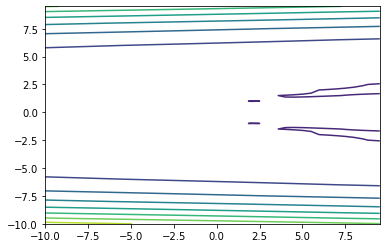

In [82]:
delta = 0.5
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3 - X**3) + 50 * (2*Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### part 3

Set up the gradient descent algorithm which will include:
1. gradient function using the partial derivatives of f(x,y)
2. a function to step through the gradient
3. a function to visualize the progress of the result and allow for interactivity

In [83]:
def grad_f(vector):
    x, y = vector
    df_dx = - 3*x**2 - 100 * (2*y**2 - x)
    df_dy = 400*y * (2*y**2 - x)
    return np.array([df_dx, df_dy])

In [137]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    
    if starting_point is None: # pick a random starting point if one not provided
        starting_point = np.random.uniform(-10,10,size=2)
        
    traj = np.zeros((iterations,2)) # initialize vector for trajectory
    
    # iterate through gradient descent
    for i in range(iterations):
        traj[i,:] = starting_point # store the current point in the trajectory array
        grad_i = grad_f(starting_point) # get the gradient at that point
        starting_point = starting_point - learning_rate * grad_i # update the point using the learning rate and gradient
    
    return traj

In [122]:
np.random.seed(10)
init_notebook_mode(connected=True) 
def optimization_graph(iterations, learning_rate):
    iterations = int(iterations)
    traj = grad_descent(iterations=iterations, learning_rate=learning_rate)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    plt.title(f'learning rate: {learning_rate}, iterations: {iterations}')

# this function is interactive! You have to be in jupyter lab to make it work though
# I will include some snapshots for ease of grading
interact(optimization_graph, 
         learning_rate=np.linspace(0.000001,0.00001,10), iterations = np.arange(1000,11000,1000));

interactive(children=(Dropdown(description='iterations', options=(1000, 2000, 3000, 4000, 5000, 6000, 7000, 80…

If you are already on the side of the hill then you tend towards the right side

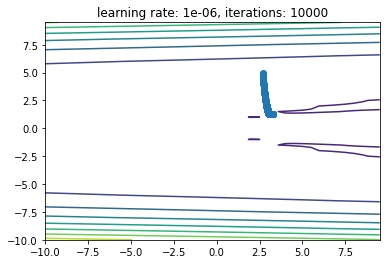

In [123]:
optimization_graph(iterations = 10000, learning_rate = 0.000001)

Sometimes the starting point will cause the trajectory to find a different minimum

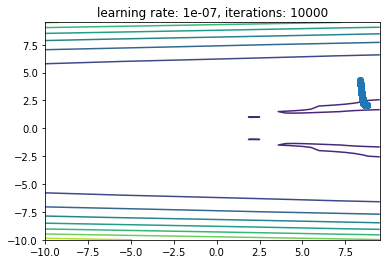

In [131]:
optimization_graph(iterations = 10000, learning_rate = 0.0000001)

#### part 4

Modified descent algorithm and modified graphing function to take into account different momentum levels

In [179]:
def grad_descent_momentum(starting_point=None, iterations=10, epsilon=12, alpha = 0.9):
    
    if starting_point is None: # pick a random starting point if one not provided
        starting_point = np.random.uniform(-10,10,size=2)
        
    traj = np.zeros((iterations,2)) # initialize vector for trajectory
    velocity = np.zeros(starting_point.size) # initialize velocity for dimensions
    
    # iterate through gradient descent
    for i in range(iterations):
        traj[i,:] = starting_point # store the current point in the trajectory array
        grad_i = grad_f(starting_point) # get the gradient at that point
        velocity = alpha * velocity + epsilon * grad_i # calculate velocity based on learning rate and momentum hyperparameters
        starting_point = starting_point - velocity # update the point
    
    return traj

In [220]:
np.random.seed(10)
init_notebook_mode(connected=True) 
def optimization_graph(iterations, learning_rate, alpha, starting_point = np.random.uniform(-10,10,size=2)):
    iterations = int(iterations)
    traj = grad_descent_momentum(iterations=iterations, 
                                 epsilon=learning_rate, 
                                 alpha = alpha,
                                 starting_point = starting_point)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')
    plt.title(f'learning rate: {learning_rate}, iterations: {iterations}')
    
# this function is interactive! You have to be in jupyter lab to make it work though
# I will include some snapshots for ease of grading
interact(optimization_graph, 
         learning_rate = np.linspace(0.000001,0.00001,10), 
         iterations = np.arange(1000,11000,1000), 
         alpha = np.linspace(0.02,1.0,50, endpoint = True),
         starting_point = fixed(np.random.uniform(-10,10,size=2)));

interactive(children=(Dropdown(description='iterations', options=(1000, 2000, 3000, 4000, 5000, 6000, 7000, 80…

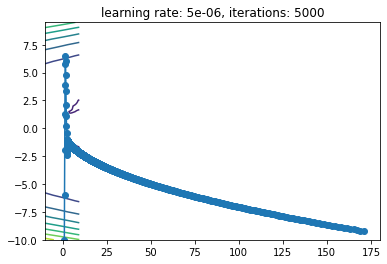

In [234]:
optimization_graph(iterations = 5000, learning_rate = 0.000005, alpha = 0.8, starting_point = np.array([1,-10]))

This result shows an momentum (alpha) that is too high and causes a vast overshoot of the lowest point for the valley

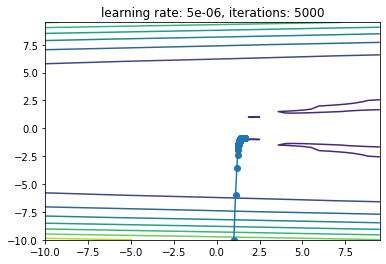

In [236]:
optimization_graph(iterations = 5000, learning_rate = 0.000005, alpha = 0.4, starting_point = np.array([1,-10]))

Lowering the momentum results in a better descent

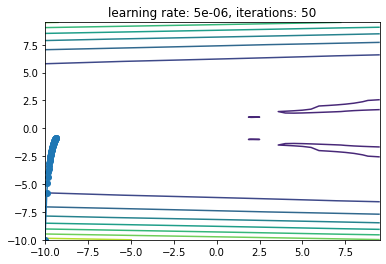

In [244]:
optimization_graph(iterations = 50, learning_rate = 0.000005, alpha = 0.0, starting_point = np.array([-10,-10]))

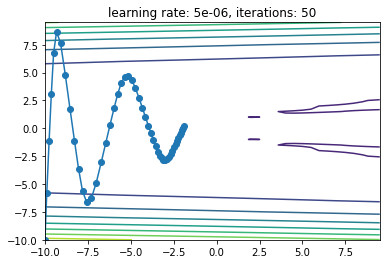

In [245]:
optimization_graph(iterations = 50, learning_rate = 0.000005, alpha = 0.9, starting_point = np.array([-10,-10]))

The previous two graphs show clearly why momentum is so helpful for performing gradient descent. We are able to gain momentum on the downward slope and achieve a good minimum in 50 iterations when our steps would have been too small without any momentum (alpha=0)

## Question 3

#### part 1

$ L = \frac{1}{N} * \sum_{i}^N (-y_i*log(\hat{y_i})-(1-y_i)*log(1-\hat{y_i})) $

$ \frac{\partial L}{\partial \hat{y_i}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) $, and for the entire dataset  $ \frac{\partial L}{\partial \hat{y}} = \frac{1}{N} \sum_{i}^N \frac{\partial L}{\partial \hat{y_i}} $

$ \frac{\partial y}{\partial z_y} = \frac{\partial}{\partial z_y} \sigma(z_y) = \sigma(z_y) * (1 - \sigma(z_y))$

$ \frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial b} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y) (1 - \sigma(z_y)) * 1$

$ \frac{\partial L}{\partial v_1} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial v_1} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y) (1 - \sigma(z_y)) * h_1$

$ \frac{\partial L}{\partial v_2} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial v_2} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y) (1 - \sigma(z_y)) * h_2$

$ \frac{\partial L}{\partial v_3} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial v_3} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y) (1 - \sigma(z_y)) * h_3$

$ \frac{\partial L}{\partial v_4} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial v_4} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y) (1 - \sigma(z_y)) * h_4$

$ \frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_1} * \frac{\partial h_1}{\partial z_1} * \frac{\partial z_1}{\partial b_1} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_1 * \sigma(z_1)(1 - \sigma(z_1)) * 1$

$ \frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_2} * \frac{\partial h_2}{\partial z_2} * \frac{\partial z_2}{\partial b_2} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_2 * \sigma(z_2)(1 - \sigma(z_2)) * 1$

$ \frac{\partial L}{\partial b_3} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_3} * \frac{\partial h_3}{\partial z_3} * \frac{\partial z_3}{\partial b_3} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_3 * \sigma(z_3)(1 - \sigma(z_3)) * 1$

$ \frac{\partial L}{\partial b_4} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_4} * \frac{\partial h_4}{\partial z_4} * \frac{\partial z_4}{\partial b_4} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_4 * \sigma(z_4)(1 - \sigma(z_4)) * 1$

$ \frac{\partial L}{\partial w_{11}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_1} * \frac{\partial h_1}{\partial z_1} * \frac{\partial z_1}{\partial w_{11}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_1 * \sigma(z_1)(1 - \sigma(z_1)) * x_1$

$ \frac{\partial L}{\partial w_{12}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_2} * \frac{\partial h_2}{\partial z_2} * \frac{\partial z_2}{\partial w_{12}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_2 * \sigma(z_2)(1 - \sigma(z_2)) * x_1$

$ \frac{\partial L}{\partial w_{13}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_3} * \frac{\partial h_3}{\partial z_3} * \frac{\partial z_3}{\partial w_{13}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_3 * \sigma(z_3)(1 - \sigma(z_3)) * x_1$

$ \frac{\partial L}{\partial w_{14}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_4} * \frac{\partial h_4}{\partial z_4} * \frac{\partial z_4}{\partial w_{14}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_4 * \sigma(z_4)(1 - \sigma(z_4)) * x_1 $

$ \frac{\partial L}{\partial w_{21}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_1} * \frac{\partial h_1}{\partial z_1} * \frac{\partial z_1}{\partial w_{21}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_1 * \sigma(z_1)(1 - \sigma(z_1)) * x_2$

$ \frac{\partial L}{\partial w_{22}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_2} * \frac{\partial h_2}{\partial z_2} * \frac{\partial z_2}{\partial w_{22}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_2 * \sigma(z_2)(1 - \sigma(z_2)) * x_2$

$ \frac{\partial L}{\partial w_{23}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_3} * \frac{\partial h_3}{\partial z_3} * \frac{\partial z_3}{\partial w_{23}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_3 * \sigma(z_3)(1 - \sigma(z_3)) * x_2$

$ \frac{\partial L}{\partial w_{24}} = \frac{\partial L}{\partial \hat{y}}  *  \frac{\partial \hat{y}}{\partial z_y} * \frac{\partial z_y}{\partial h_4} * \frac{\partial h_4}{\partial z_4} * \frac{\partial z_4}{\partial w_{24}} = - (\frac{y_i}{\hat{y_i}} + \frac{1 - y_i}{1 - \hat{y_i} }) * \sigma(z_y)(1 - \sigma(z_y)) * v_4 * \sigma(z_4)(1 - \sigma(z_4)) * x_2 $


#### part 2

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z)))
def relu(z):
    return np.where(z > 0, z, 0)
def sigmoid_prime(z):
    return (sigmoid(z)*(1-sigmoid(z)))
def relu_prime(z):
    return z

In [17]:
def nn_layer(X, W, b, f):
    z = np.dot(X, W) + b
    return z, f(z)

def ff_nn_ReLu(X, W_1, b_1, f_1, W_2, b_2, f_2):
    z1, H = nn_layer(X, W_1, b_1, f_1)
    z2, Y_hat = nn_layer(H, W_2, b_2, f_2)
    return z1, H, z2, Y_hat

In [107]:
def loss(y_true, y_hat):
    # binary crossentropy loss for label-encoded inputs
    return - y_true*np.log(y_hat) - (1-y_true)*np.log(1 - y_hat)
def dL_dy(y_true, y_hat):
    return (- (( y_true / y_hat) - ((1-y_true)/(1-y_hat))))

In [108]:
# pratice code
dL_dy(np.array([1,0]),np.array([0.2,0.8]))
W_1 = np.array([[1,-1,0,1],[0,0,0.5,1]])
b_1 = np.array([0,0,1,0])
W_2 = np.transpose(np.array([1,0,-1,1]))
b_2 = np.array([1])
z1, H, z2, predictions = ff_nn_ReLu(x_train, W_1, b_1, relu, W_2, b_2, sigmoid)
#grad_f(z1,H,z2,W_2,x_train,y_train,predictions)

In [109]:
def grad_f(z1, H, z2, W_2, x, y_true, y_hat):

    dL_W2 = np.average( dL_dy(y_true, y_hat).reshape(-1,1) * sigmoid_prime(z2).reshape(-1,1) * H, axis = 0 )
    dL_b2 = np.average( dL_dy(y_true, y_hat).reshape(-1,1) * sigmoid_prime(z2).reshape(-1,1) * 1 )
    dL_b1 = np.average( dL_dy(y_true, y_hat).reshape(-1,1) * sigmoid_prime(z2).reshape(-1,1) * W_2 * sigmoid_prime(z1), axis = 0 )
    dL_W1 = np.dot(np.transpose(x), dL_dy(y_true, y_hat).reshape(-1,1) * sigmoid_prime(z2).reshape(-1,1) * W_2 * sigmoid_prime(z1))
    
    return ([dL_W1, dL_b1, dL_W2, dL_b2])

#### part 3

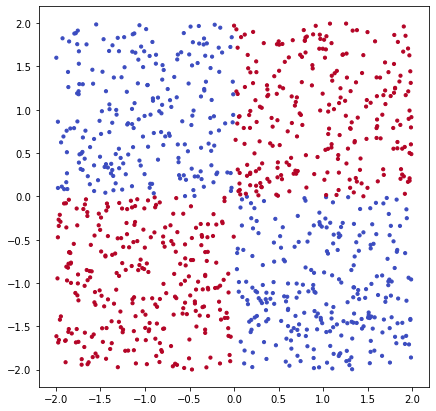

In [110]:
N = 1000
def binary_classification_data(N):
    x = np.random.uniform(low=-2, high=2, size=(N, 2))
    x = np.array(x, dtype = 'float32')
    y = (x[:, 0] * x[:, 1] > 0).astype(np.int)
    return x, y

x_train, y_train = binary_classification_data(N)

plt.figure(figsize=(7, 7))
plt.scatter(x_train[:, 0], x_train[:, 1], s=10, c=y_train, cmap='coolwarm')
plt.show()

#### part 4

In [111]:
def grad_descent(X, y, iterations=100, learning_rate=1e-1):
    """
    Args
        x (np.array) 
        y (np.array)
        iterations (int) number of iterations before stopping
        learning_rate (float) 
        
    
    Returns
        (list of numpy objects) model parameterse
        (np.array) total loss metric throughout gradient descent iterations
    """
    
    # set up network matrices
    W_1 = np.random.uniform(-1,1,(2,4))
    b_1 = np.random.uniform(-1,1,(4,))
    W_2 = np.random.uniform(-1,1,(4,))
    b_2 = np.random.uniform(-1,1,(1,))
    
    losses = np.zeros((iterations,1))
    
    for i in range(iterations):
        # determine predictions with relu hidden layer and sigmoid output layer
        z1, H, z2, predictions = ff_nn_ReLu(X, W_1, b_1, relu, W_2, b_2, sigmoid)
        
        # calculate gradient for parameters
        grad_i = grad_f(z1, H, z2, W_2, X, y, predictions)
        
        # update parameters based on gradient and learning rate
        W_1 = W_1 - learning_rate * grad_i[0]
        b_1 = b_1 - learning_rate * grad_i[1]
        W_2 = W_2 - learning_rate * grad_i[2]
        b_2 = b_2 - learning_rate * grad_i[3]
        
        # get loss and save
        losses[i] = np.average( loss(y.reshape(-1,1), predictions.reshape(-1,1)) )
        if i % (iterations / 10) == 0:
            print(f'iteration: {i}, loss: {losses[i]}')
            
    print(f'final loss after {i} iterations: {losses[i]}')
    return [W_1, b_1, W_2, b_2], losses


In [112]:
model, losses = grad_descent(x_train, y_train, iterations=50000,learning_rate=0.001)

iteration: 0, loss: [0.68867303]
iteration: 5000, loss: [0.30781905]
iteration: 10000, loss: [0.21097877]
iteration: 15000, loss: [0.16327655]
iteration: 20000, loss: [0.14035003]
iteration: 25000, loss: [0.12956551]
iteration: 30000, loss: [0.12228081]
iteration: 35000, loss: [0.116176]
iteration: 40000, loss: [0.10981057]
iteration: 45000, loss: [0.10376529]
final loss after 49999 iterations: [0.09836703]


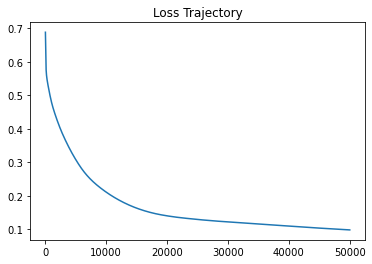

In [113]:
plt.plot(range(len(losses)), losses)
plt.title('Loss Trajectory')
plt.show()

#### part 5

In [114]:
def grad_descent_momentum(X, y, starting_point=None, iterations=100, learning_rate=1e-1, alpha = 0.5):
    """
    Args
        X (np.array) 
        y (np.array)
        iterations (int) number of iterations before stopping
        learning_rate (float) 
        alpha (float)
        
    
    Returns
        (list of numpy objects) model parameterse
        (np.array) total loss metric throughout gradient descent iterations
    """
    
    # set up network matrices
    W_1 = np.random.uniform(-1,1,(2,4))
    b_1 = np.random.uniform(-1,1,(4,))
    W_2 = np.random.uniform(-1,1,(4,))
    b_2 = np.random.uniform(-1,1,(1,))
    
    
    # set up ojbect to store velocity
    vel_W_1 = np.zeros((2,4))
    vel_b_1 = np.zeros((4,))
    vel_W_2 = np.zeros((4,))
    vel_b_2 = np.zeros((1,))
    
    # set up object to store losses
    losses = np.zeros((iterations,1))
    
    for i in range(iterations):
        # determine predictions with relu hidden layer and sigmoid output layer
        z1, H, z2, predictions = ff_nn_ReLu(X, W_1, b_1, relu, W_2, b_2, sigmoid)
        
        # calculate gradient of parameters
        grad_i = grad_f(z1, H, z2, W_2, X, y, predictions)
        
        # update parameters based on learning rate and alpha
        vel_W_1 = alpha * vel_W_1 + learning_rate * grad_i[0]
        W_1 = W_1 - vel_W_1
        vel_b_1 = alpha * vel_b_1 + learning_rate * grad_i[1]
        b_1 = b_1 - vel_b_1
        vel_W_2 = alpha * vel_W_2 + learning_rate * grad_i[2]
        W_2 = W_2 - vel_W_2
        vel_b_2 = alpha * vel_b_2 + learning_rate * grad_i[3]
        b_2 = b_2 - vel_b_2
        
        # calculate and save loss
        losses[i] = np.average( loss(y.reshape(-1,1), predictions.reshape(-1,1)) )
        if i % (iterations / 10) == 0:
            print(f'iteration: {i}, loss: {losses[i]}')
            
    print(f'final loss after {i} iterations: {losses[i]}')
    return [W_1, b_1, W_2, b_2], losses

In [127]:
model_mom, losses = grad_descent_momentum(x_train, y_train, iterations=50000,learning_rate=0.0002, alpha = 0.8)

iteration: 0, loss: [0.75910192]
iteration: 5000, loss: [0.25678919]
iteration: 10000, loss: [0.15456495]
iteration: 15000, loss: [0.12663632]
iteration: 20000, loss: [0.11247092]
iteration: 25000, loss: [0.1025612]
iteration: 30000, loss: [0.09479948]
iteration: 35000, loss: [0.08842564]
iteration: 40000, loss: [0.0830441]
iteration: 45000, loss: [0.07839053]
final loss after 49999 iterations: [0.07417961]


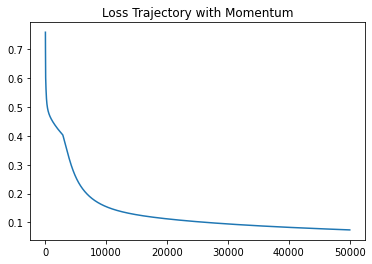

In [128]:
plt.plot(range(len(losses)), losses)
plt.title('Loss Trajectory with Momentum')
plt.show()

Adding momentum to the algorithm improve the efficiency of convergence most of the time. I experimented with alpha 0.3-0.99 and learning rate 1e-1 to 1e-6 to find a good value for the parameters. The final result of the model improves slightly with momentum under the right circumstances. But most of the time the final result was about the same. The biggest improvement of using momentum is the speed at which one might get to a good minimum value.

#### part 6

In [131]:
def binary_preds(param_final, x_minmax=2):
    x_grid = np.linspace(-x_minmax, x_minmax, 100, dtype = 'float32')
    mesh = np.meshgrid(x_grid, x_grid)
    xs_grid = np.stack(mesh, axis=-1)
    W_1,b_1,W_2,b_2 = param_final
    z1, H, z2, yhat = ff_nn_ReLu(xs_grid.reshape(10000,2), W_1, b_1, relu, W_2, b_2, sigmoid)
    
    plt.scatter(x_train[:, 0], 
                x_train[:, 1], 
                s=10, 
                c=y_train, 
                cmap='coolwarm', 
                alpha = 0.2)
    
    plt.contour(xs_grid.reshape(10000,2)[:,1].reshape(100,100), 
                xs_grid.reshape(10000,2)[:,0].reshape(100,100), 
                yhat.reshape(100,100), 
                cmap=plt.cm.Paired)
    
    
    #plt.imshow(yhat.reshape(100,100), cmap='coolwarm')
    plt.colorbar()

The points and the contoured decision line are shown below. We see that the model is doing a great job of classifying the data!

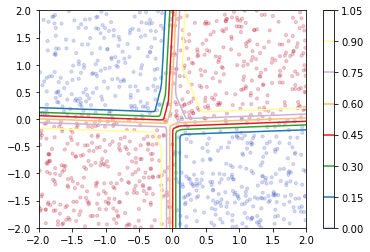

In [132]:
binary_preds(model_mom)